---
# Create configuration file for working with Salish Sea Model results

---


In [1]:
import sys
import yaml
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

## Define main directory 

In [2]:
# Main dictionary used to output values to SSM_config.yaml
ssm = {}

## Model variable names for two versions of model output
- The model output used in the bounding scenario runs names variables as "Var_XX". `model_tags` is a dictionary that relates variable names to the model output names.  i.e. ```ssm['var_name']['DO'] yields 'Var_10'```, which is the SSM variable name for "DO"
- The output netcdf from Ben's C++ script yields the `name_list` of variables 

In [3]:
ssm['variables']={}

# Bounding Scenario runs
variable_name_list=['DO','NH3','NO3','NPP','Temp','Salinity']
parameter_ID_list=['Var_10','Var_14','Var_15','Var_17','Var_18','Var_19']
ssm['variables']['model_tags'] = {
    variable_name_list[i]: parameter_ID_list[i] \
    for i in range(len(variable_name_list))
}

# King County runs
ssm['variables']['name_list']=['time','depth','DOXG','LDOC','B1','B2',
                    'NH4','NO3','PO4','temp','salinity','RDOC','LPOC',
                    'RPOC','TDIC','TALK','pH','pCO2'] 

## Create array of percentages for depth levels
Multiply these values by the total depth of the water column to get the layer thickness for each model level. This layer thickness is used to calculate volume days.
These values were provided by Su Kyong Yun in her script `volume_calculation.py` on 6/9/2022.

In [4]:
ssm['siglev_diff']=numpy.array(
    [ 3.2,  5.7,  7.5,  8.9, 10.1, 11.1, 12.1, 13. , 13.8, 14.6]
).tolist() #b/c savedump dosn't allow for objects

## Create dictionary for station locations
My code hasn't yet been updated to utilize this dictionary but I'm placing it here for the next round of upgrades and for archive/reference purposes

In [5]:
ssm['stations']={
    'NOAA_46118':[48.724, -122.576],
    'BHAM-Bay':[48.767422,-122.575792],
    'Birch Bay':[48.898880,-122.781905],
    'Birch Bay (Point Whitehorn)': [48.895273,-122.805067],
    'Cherry Point': [48.868451,-122.780400],
    'Eastsound':[48.684406,-122.898953],
    'Quartermaster Harbor': [47.3793, -122.462]
}

## Define colors used for plotting
See [this cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png) or [this list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for more color options

Run list will include:
1. WWTP
    - a. **Baseline**: all plants on (using output data set for Existing, Ecology (2021))
    - b. **no SOG/NB WWTP source**: All SOG/NB WWTPs plants off (data from Scenario 4, Ecology (2021)
    - c. **BHAM-only**: Shutting off all small WWTP plants (BNR <100) = all except Bellngham
    - e. **no BHAM**: Shutting off only the 1 medium plant (BNR >100) (Bellingham).
2. Rivers
    - a. **no SOB/NB riverine source**: All river inputs from watershed loading to SOG/NB off (data from Scenario 4, Ecology (2021).
    - b. **0.5x riverine** loading for those rivers entering SOG/NB
    - c. **2x  riverine** loading for those rivers entering SOG/NB

darkviolet
royalblue
teal
darkgoldenrod
darkslategrey
steelblue
sienna
brown


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


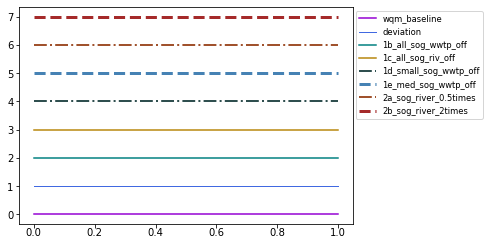

In [6]:
ssm['line']={}
ssm['line']['color']={}
ssm['line']['width']={}
ssm['line']['style']={}

ssm['line']['color']['wqm_baseline'] = 'darkviolet'
ssm['line']['color']['deviation'] = 'royalblue'
ssm['line']['color']['1b_all_sog_wwtp_off']='teal'
ssm['line']['color']['1c_all_sog_riv_off']= 'darkgoldenrod'
ssm['line']['color']['1d_small_sog_wwtp_off']='darkslategrey'
ssm['line']['color']['1e_med_sog_wwtp_off']='steelblue'
ssm['line']['color']['2a_sog_river_0.5times']= 'sienna'
ssm['line']['color']['2b_sog_river_2times']= 'brown'

ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['deviation'] = 1
ssm['line']['width']['1b_all_sog_wwtp_off']=1.5
ssm['line']['width']['1c_all_sog_riv_off']= 1.5
ssm['line']['width']['1d_small_sog_wwtp_off']=2.0
ssm['line']['width']['1e_med_sog_wwtp_off']=3.0
ssm['line']['width']['2a_sog_river_0.5times']= 2.0
ssm['line']['width']['2b_sog_river_2times']= 3.0

ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['deviation'] = 'solid'
ssm['line']['style']['1b_all_sog_wwtp_off']='solid'
ssm['line']['style']['1c_all_sog_riv_off']= 'solid'
ssm['line']['style']['1d_small_sog_wwtp_off']='dashdot'
ssm['line']['style']['1e_med_sog_wwtp_off']='dashed'
ssm['line']['style']['2a_sog_river_0.5times']= 'dashdot'
ssm['line']['style']['2b_sog_river_2times']= 'dashed'
# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][case])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][case],
            linestyle=ssm['line']['style'][case],
            linewidth=ssm['line']['width'][case],
            label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

grey
royalblue
palevioletred
lightsteelblue
mediumpurple
indigo
cadetblue
darkslategrey


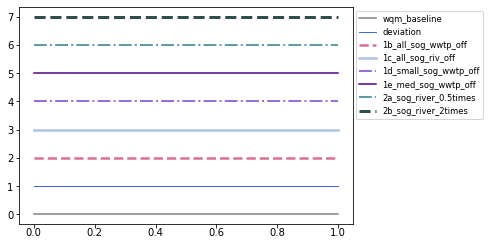

In [7]:
ssm['line']['color']['wqm_baseline'] = 'grey'
ssm['line']['color']['1b_all_sog_wwtp_off']='palevioletred'
ssm['line']['color']['1c_all_sog_riv_off']= 'lightsteelblue'
ssm['line']['color']['1d_small_sog_wwtp_off']='mediumpurple'
ssm['line']['color']['1e_med_sog_wwtp_off']='indigo'
ssm['line']['color']['2a_sog_river_0.5times']= 'cadetblue'
ssm['line']['color']['2b_sog_river_2times']= 'darkslategrey'
    
ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['1b_all_sog_wwtp_off']=2.5
ssm['line']['width']['1c_all_sog_riv_off']= 2.5
ssm['line']['width']['1d_small_sog_wwtp_off']=2.0
ssm['line']['width']['1e_med_sog_wwtp_off']=1.5
ssm['line']['width']['2a_sog_river_0.5times']= 2.0
ssm['line']['width']['2b_sog_river_2times']= 3.0

ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['1b_all_sog_wwtp_off']='dashed'
ssm['line']['style']['1c_all_sog_riv_off']= 'solid'
ssm['line']['style']['1d_small_sog_wwtp_off']='dashdot'
ssm['line']['style']['1e_med_sog_wwtp_off']='solid'
ssm['line']['style']['2a_sog_river_0.5times']= 'dashdot'
ssm['line']['style']['2b_sog_river_2times']= 'dashed'
# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][case])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][case],
            linestyle=ssm['line']['style'][case],
            linewidth=ssm['line']['width'][case],
            label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

## Define colors for different parameters

In [8]:
ssm['bar']={}
ssm['bar']['colors']={}
ssm['bar']['colors']['DOXG']='deepskyblue'
ssm['bar']['colors']['NO3']='y'
ssm['bar']['colors']['NH4']='darkolivegreen'

## Define location(s) for model output and graphics files

In [9]:
# dictionary of output_path indices by run type for code readability
# still a work in progress for how I will define/use this dictionary
ssm['run_index']={
    'Baseline':0,
    'No SOG/NB WWTP':1,
    'No SOG/NB River Loading':2,
    'No BNR<100 WWTP':3,
    'No BNR>100 WWTP':4,
    '0.5x SOG/NB River Loading':5,
    '2.0x SOG/NB River Loading':6
}

ssm['run_tag']={
    'Baseline':0,
    'No_SOGNB_WWTP':1,
    'No_SOGNB_RiverLoading':2,
    'No_lt100_WWTP':3,
    'No_gt100_WWTP':4,
    '0p5x_SOGNB_RiverLoading':5,
    '2p0x_SOGNB_RiverLoading':6
}

## Path definitions

In [10]:
root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/'
ssm['paths']={}
ssm['paths']['model_output'] = [
    root_output+'wqm_baseline/ssm_output.nc',
     root_output+'1b_all_sog_wwtp_off/ssm_output.nc',
     root_output+'1c_all_sog_riv_off/ssm_output.nc',
     root_output+'1d_small_sog_wwtp_off/ssm_output.nc',
     root_output+'1e_med_sog_wwtp_off/ssm_output.nc',
     root_output+'2a_sog_river_0.5times/ssm_output.nc',
     root_output+ '2b_sog_river_2times/ssm_output.nc'   
    ]
ssm['paths']['processed_output'] = ( 
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/'
)
# Define location and name of Shapefile to use for planar graphics
ssm['paths']['shapefile'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/KingCounty-Rachael/'\
    'kevin_shapefiles/SSMGrid2_062822/SSMGrid2_062822.shp'
)
# Define directory for saving graphics output
ssm['paths']['graphics'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/'
)

## Run information

In [11]:
ssm['run_information']={}
ssm['run_information']['baseline']='wqm_baseline'
ssm['run_information']['run_description']={
    'wqm_baseline':'Baseline',
    '1b_all_sog_wwtp_off':'1b: No SOG/NB WWTP',
    '1c_all_sog_riv_off':'1c: No SOG/NB River Loading',
    '1d_small_sog_wwtp_off':'1d: No SOG/NB WWTP<100',
    '1e_med_sog_wwtp_off': '1e: No SOG/NB WWTP>100',
    '2a_sog_river_0.5times':'2a: 0.5x(River Loading)\nin SOG/NB',
    '2b_sog_river_2times':'2b: 2.0x(River Loading)\nin SOG/NB'
}
ssm['run_information']['run_tag']={
    'wqm_baseline':'Baseline',
    '1b_all_sog_wwtp_off':'1b',
    '1c_all_sog_riv_off':'1c',
    '1d_small_sog_wwtp_off':'1d',
    '1e_med_sog_wwtp_off': '1e',
    '2a_sog_river_0.5times':'2a',
    '2b_sog_river_2times':'2b'
}

### Keeping this next section for now, for reference

In [12]:
# # ~~~ BEGIN REMOVE ~~~
# root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Adi/BS_WQM/'
# ssm['output_paths'] = [
#     root_output+'2014_SSM4_WQ_exist_orig/hotstart/outputs',
#      root_output+'2014_SSM4_WQ_ref_orig/hotstart/outputs',
#      root_output+'2014_SSM4_WQ_rvr0.5_reg/hotstart/outputs',
#      root_output+'2014_SSM4_WQ_wwtp0.0_reg/hotstart/outputs',
#      root_output+'2014_SSM4_WQ_wwtp1.5_reg/hotstart/outputs',
#      root_output+'2014_SSM4_WQ_wwtp0.5_reg/hotstart/outputs'
#     ] 
# # dictionary of output_path indices by run type for code readability
# # still a work in progress for how I will define/use this dictionary
# ssm['run_index']={
#     'deviation':0,
#     'baseline':1,
#     'existing':0,
#     'reference':1
#}

# ssm['output_paths'] = [
#     root_output+'wqm_baseline/ssm_output.nc',
#      root_output+'1b_all_sog_wwtp_off/ssm_output.nc',
#      root_output+'1c_all_sog_riv_off/ssm_output.nc',
#      root_output+'1d_small_sog_wwtp_off/ssm_output.nc',
#      root_output+'1e_med_sog_wwtp_off/ssm_output.nc',
#      root_output+'2a_sog_river_0.5times/ssm_output.nc',
#      root_output+ '2b_sog_river_2times/ssm_output.nc'   
#     ]
# ssm['processed_netcdf_path'] = [
#     '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/slurm_array/'
# ]
# # Define location and name of Shapefile to use for planar graphics
# ssm['shapefile_path'] = (
#     '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/KingCounty-Rachael/'\
#     'kevin_shapefiles/SSMGrid2_062822/SSMGrid2_062822.shp'
# )
# # Define directory for saving graphics output
# ssm['root_graphics'] = (
#     '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/graphics'
# )
# # ~~~ END REMOVE ~~~~

## Save specifications to file
-Use `sort_keys=False` to preserve dictionary order

In [13]:
with open('SSM_config.yaml', 'w') as file:
    document = yaml.safe_dump(ssm, file,sort_keys=True)